Comparison between orignal Graphs and Graphs with metric

In [3]:
!pip3 install dask[complete]==2023.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.6/966.6 kB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [1]:
import dask.dataframe as dd
import pandas as pd
import csv


In [2]:
def get_column_names(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Read the first line
    return header

file_path = '../data/graph_metric.csv'
columns = get_column_names(file_path)
print(columns)

['_id', '_labels', 'found', 'id', 'timestamp', 'type', 'value', 'version', '_start', '_end', '_type', 'scope', 'targetVersion']


## Explore with Dask

In [3]:
dtype_dict = {col: 'object' for col in columns}
graph_metric_csv = dd.read_csv('../data/graph_metric.csv', dtype=dtype_dict)


In [4]:
graph_metric_csv.head()

_id    _labels found                                                 id  \
0   0  :Artifact  true               com.splendo.kaluga:alerts-androidlib   
1   1  :Artifact  true  org.wso2.carbon.identity.framework:org.wso2.ca...   
2   2  :Artifact  true  org.apache.camel.quarkus:camel-quarkus-kotlin-...   
3   3   :Release   NaN  org.wso2.carbon.identity.framework:org.wso2.ca...   
4   4   :Release   NaN  org.apache.camel.quarkus:camel-quarkus-kotlin-...   

       timestamp type value   version _start _end _type scope targetVersion  
0            NaN  NaN   NaN       NaN    NaN  NaN   NaN   NaN           NaN  
1            NaN  NaN   NaN       NaN    NaN  NaN   NaN   NaN           NaN  
2            NaN  NaN   NaN       NaN    NaN  NaN   NaN   NaN           NaN  
3  1626148242000  NaN   NaN  5.20.111    NaN  NaN   NaN   NaN           NaN  
4  1583239943000  NaN   NaN  1.0.0-M4    NaN  NaN   NaN   NaN           NaN

In [8]:
uni_ids = graph_metric_csv['id'].compute().unique()
# have to reduce nan
print(len(uni_ids))

59152713


In [ ]:
# get total unique metrics
type_stas=graph_metric_csv['type'].compute().value_counts()
print(type_stas)

In [ ]:
total_len = len(graph_metric_csv)
print("Total number of packages with releases is:", total_len)


In [ ]:
print(perc_csv)

In [ ]:
# check the unique CVEs number
uni_cves = graph_metric_csv[graph_metric_csv["type"]=="CVE"]["value"].compute().unique()
print(len(uni_cves))

In [ ]:
value_count_cves = graph_metric_csv[graph_metric_csv["type"]=="CVE"]["value"].compute().value_counts()
print(value_count_cves)

In [70]:
# check the percentage of non-blank CVEs
perc_csv = round(()/total_len, 6)
print(perc_csv)

0.000326


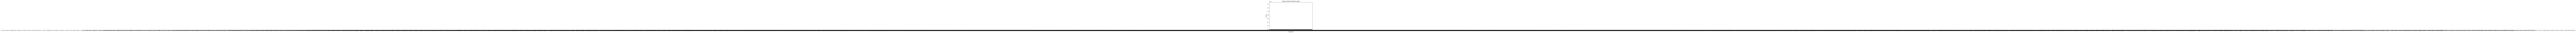

In [72]:
import matplotlib.pyplot as plt

# remove the blank value
value_count_cves_no_nan = value_count_cves.drop('{\"cve\":[]}', errors="ignore")

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
value_count_cves_no_nan.plot(kind='bar', color='skyblue')
plt.title('Value Counts of column_name')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.savefig("CEV_Value_Counts.png")
plt.show()

## Explore the Metrics and Normalize Metrics

In [6]:
# check the value and type of FRESHNESS
results = graph_metric_csv[graph_metric_csv['type']=="FRESHNESS"]["value"][:10].compute()
print(results)

1    {\"freshness\":{\"numberMissedRelease\":\"189\...
3    {\"freshness\":{\"numberMissedRelease\":\"309\...
5    {\"freshness\":{\"numberMissedRelease\":\"68\"...
7    {\"freshness\":{\"numberMissedRelease\":\"168\...
9    {\"freshness\":{\"numberMissedRelease\":\"62\"...
                           ...                        
1    {\"freshness\":{\"numberMissedRelease\":\"30\"...
3    {\"freshness\":{\"numberMissedRelease\":\"29\"...
5    {\"freshness\":{\"numberMissedRelease\":\"52\"...
7    {\"freshness\":{\"numberMissedRelease\":\"50\"...
9    {\"freshness\":{\"numberMissedRelease\":\"51\"...
Name: value, Length: 425, dtype: object


In [9]:
print(type(results[0]))

<class 'pandas.core.series.Series'>


In [14]:
import pandas as pd

unique_series = results.reset_index(drop=True)

# Convert to JSON
json_result = unique_series.to_json(orient='index')

In [16]:
json_result[0]

'{'

In [83]:
# check the value and type of Popularity
graph_metric_csv[graph_metric_csv['type']=="POPULARITY_1_YEAR"]["value"][:1000].value_counts().compute()


value
0      35479
1       1610
2        600
3        336
4        194
       ...  
148        1
373        1
149        1
365        1
98         1
Name: count, Length: 128, dtype: int64

In [82]:
# check the value and type of SPEED
graph_metric_csv[graph_metric_csv['type']=="SPEED"]["value"][:10].compute()

0                      0.0
1                      0.0
2      0.07142857142857142
3                      0.0
4                      0.0
5                      0.0
6      0.43478260869565216
7                      0.0
8     0.016877637130801686
9      0.13513513513513514
10    0.037037037037037035
Name: value, dtype: object

## normalize freshness

In [17]:
# create function to extract numbermissedrelease and outdatedTimeInMs, respectively
fresh_series = graph_metric_csv[graph_metric_csv['type']=="FRESHNESS"]["value"]

In [ ]:
fresh_series.compute().head()

In [ ]:
import json

fresh_json_series = graph_metric_csv[graph_metric_csv['type']=="FRESHNESS"]["value"].apply(lambda x: json.loads(x))

fresh_json_series['numberMissedRelease'] = df['json_column'].apply(lambda x: x['numberMissedRelease'])
fresh_json_series["outdatedTimeInMs"] = df["json_column"].apply(lambda x: x['outdatedTimeInMs'])

